In [1]:
# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

### Step: 1 Load Dataset

In [3]:
df = pd.read_csv('adult.csv')

### Step: 2 Understand and Viz the data

In [4]:
#looking the dataset

df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
#diamention check

df.shape

(48842, 15)

In [6]:
#datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
#statistical analysis
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


### Observations :

In [8]:
df.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [9]:
df.replace('?', np.nan, inplace=True)
df.isin(['?']).sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [10]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [11]:
# Percentage of missing values.
round(df.isnull().sum() * 100 / len(df.index), 2)

age                0.00
workclass          5.73
fnlwgt             0.00
education          0.00
educational-num    0.00
marital-status     0.00
occupation         5.75
relationship       0.00
race               0.00
gender             0.00
capital-gain       0.00
capital-loss       0.00
hours-per-week     0.00
native-country     1.75
income             0.00
dtype: float64

In [12]:
df = df.loc[df['native-country'].notnull(), :]
df = df.loc[df['occupation'].notnull(), :]

In [13]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [14]:
df.shape

(45222, 15)

In [15]:
# Percentage of rows lost in data cleaning.

(48842 - len(df.index)) * 100 / 48842

7.411653904426518

#### So, we have lost 7.41% of the rows from the dataframe. This is fine considering that we have more than 45,000 datapoints in the dataframe.

### Univariate Analysis

In [16]:
num_features = df.select_dtypes(include=['int64'])
print(num_features.columns)

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000127F9874940>,
      dtype=object)

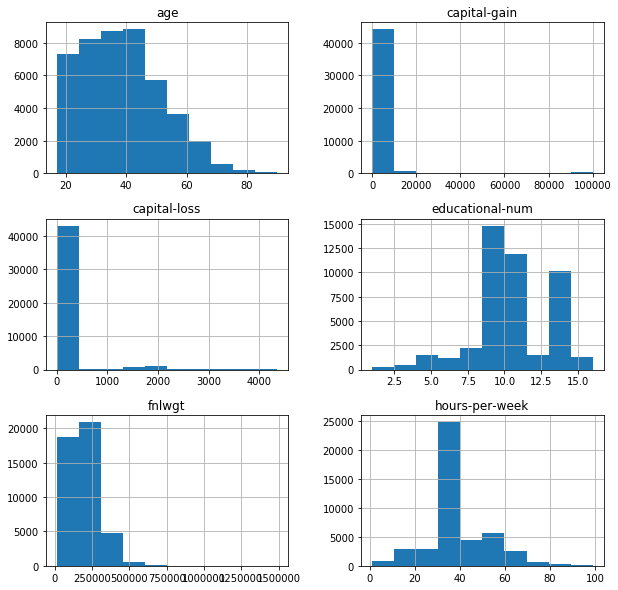

In [17]:
num_features.hist(figsize=(10,10))

In [18]:
cat_features = df.select_dtypes(include=['object'])
print(cat_features.columns)

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')


Text(0.5, 1.0, 'Income vs Marital Status')

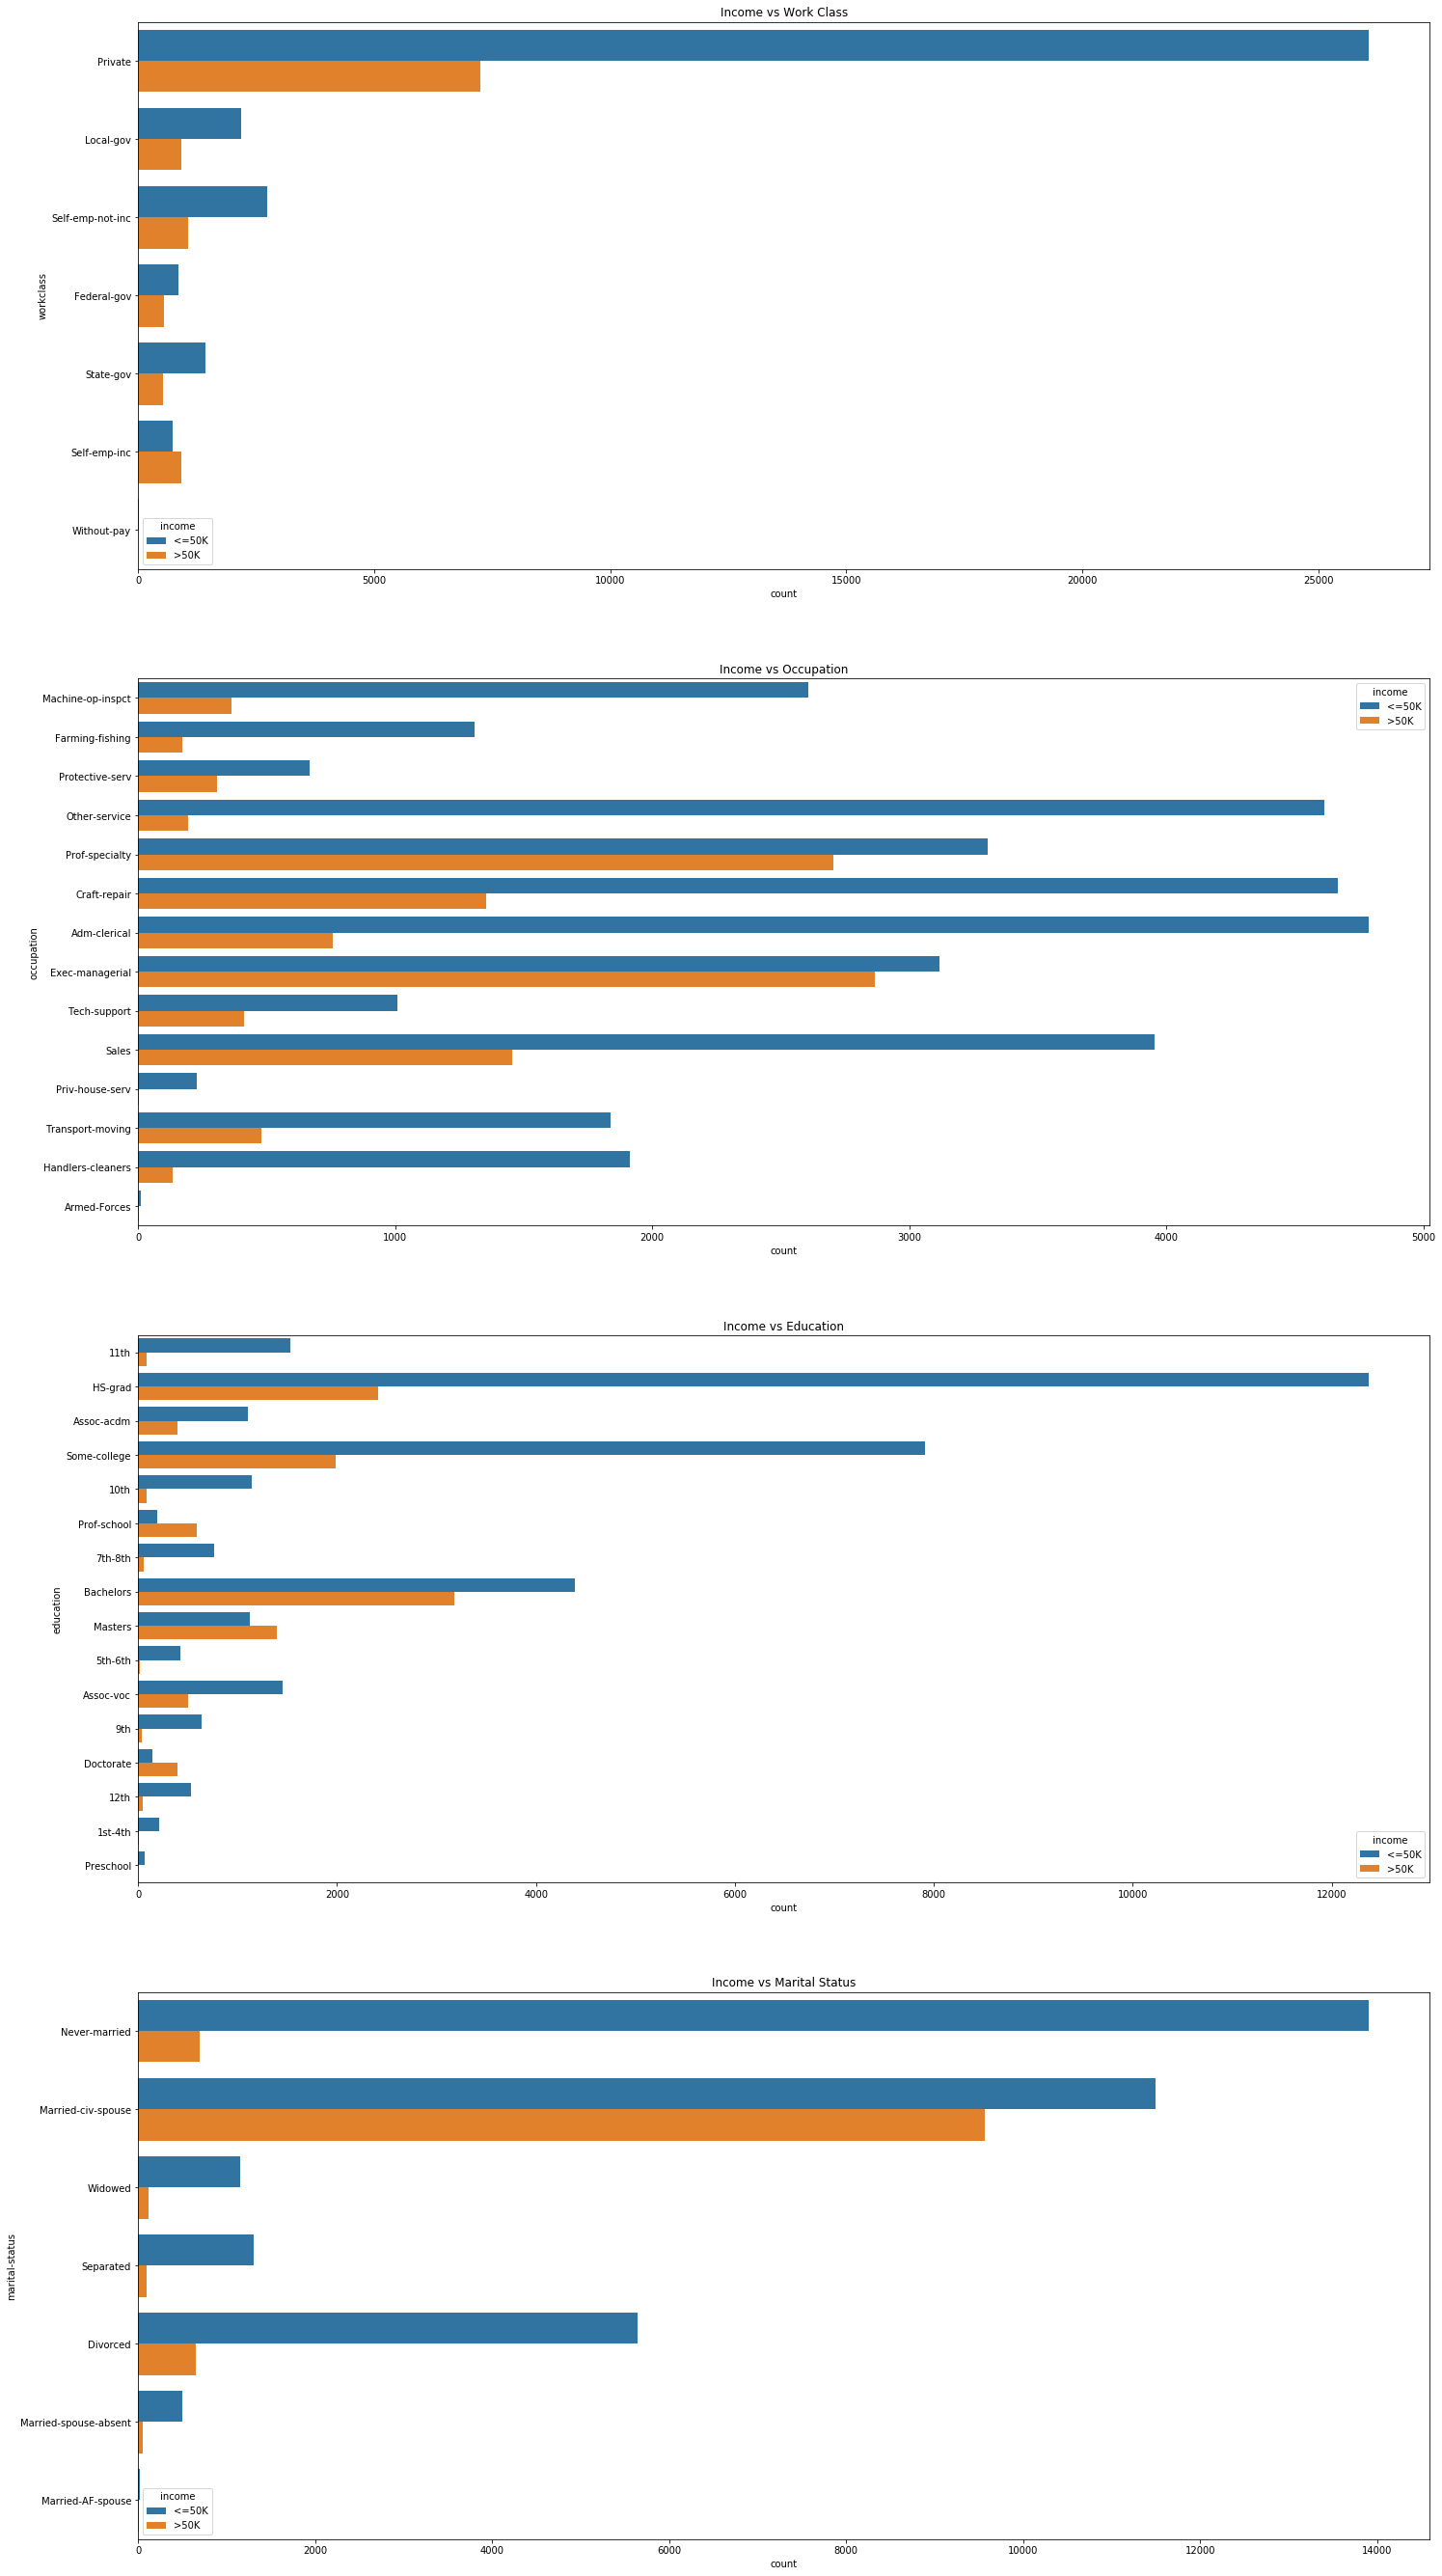

In [19]:

plt.figure(figsize=(24, 48))

plt.subplot(411)
sns.countplot(y='workclass', hue='income', data = cat_features)
plt.title('Income vs Work Class')

plt.subplot(412)
sns.countplot(y='occupation', hue='income', data = cat_features)
plt.title('Income vs Occupation')

plt.subplot(413)
sns.countplot(y='education', hue='income', data=cat_features)
plt.title('Income vs Education')

plt.subplot(414)
sns.countplot(y='marital-status', hue='income', data=cat_features)
plt.title('Income vs Marital Status')


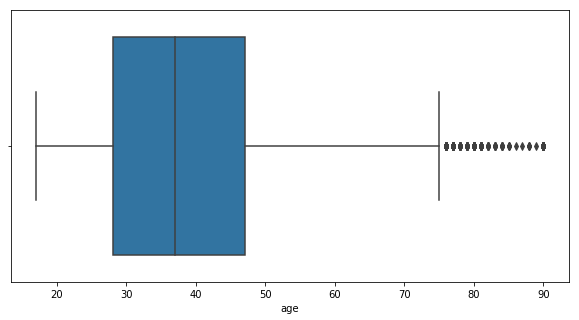

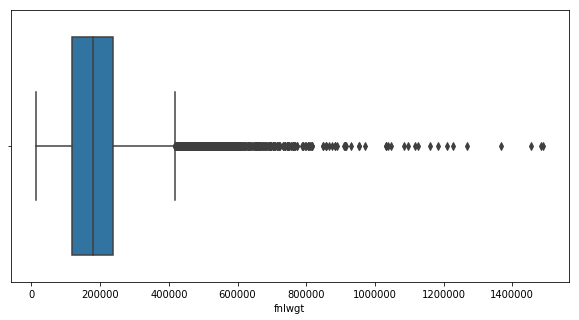

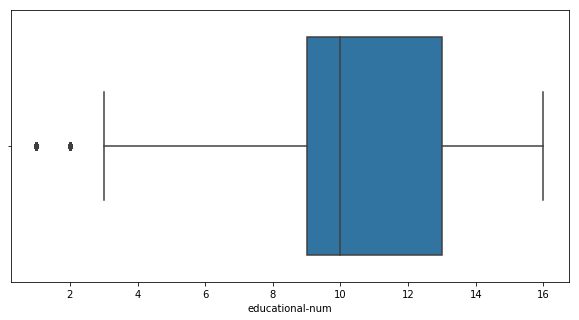

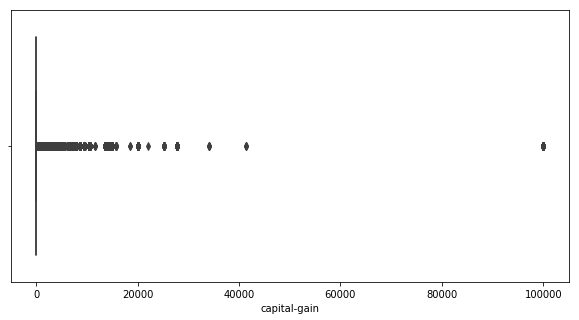

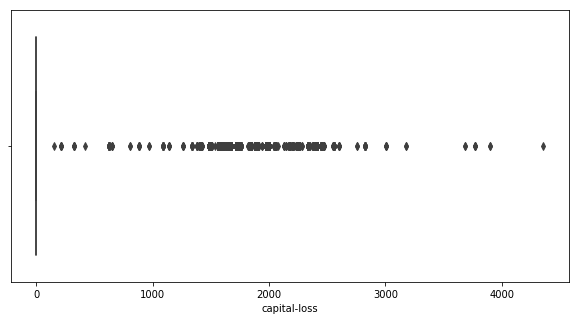

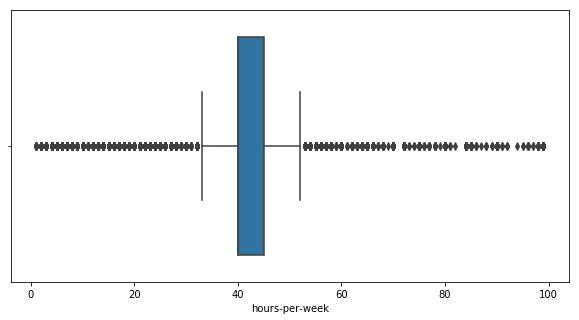

In [20]:
for num_var in num_features:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=df[num_var])
   

In [21]:
for num_var in num_features:
    outlier= df[((df[num_var]-df[num_var].mean())/df[num_var].std()).abs()>3][num_var].count()
    print(outlier)

163
471
294
310
2077
626


In [22]:
iqr = 1.5 * (np.percentile(df['age'], 75) - np.percentile(df['age'], 25))
df.drop(df[df['age'] > (iqr + np.percentile(df['age'], 75))].index, inplace=True)
df.drop(df[df['age'] < (np.percentile(df['age'], 25) - iqr)].index, inplace=True)

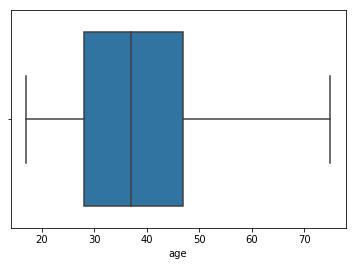

In [23]:
sns.boxplot(df['age'])

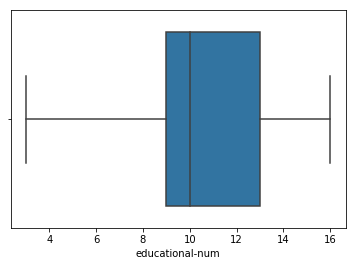

In [24]:
iqr = 1.5 * (np.percentile(df['educational-num'], 75) - np.percentile(df['educational-num'], 25))
df.drop(df[df['educational-num'] > (iqr + np.percentile(df['educational-num'], 75))].index, inplace=True)
df.drop(df[df['educational-num'] < (np.percentile(df['educational-num'], 25) - iqr)].index, inplace=True)
sns.boxplot(df['educational-num'])

In [25]:
df.shape

(44665, 15)

### Bivariate Analysis

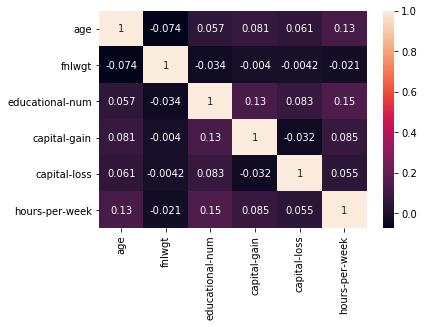

In [26]:
corr=df.corr()
sns.heatmap(corr,annot=True)

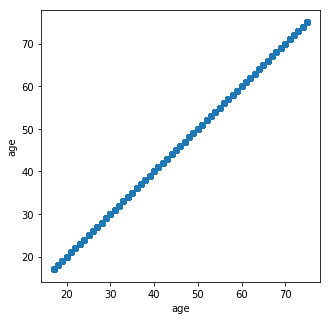

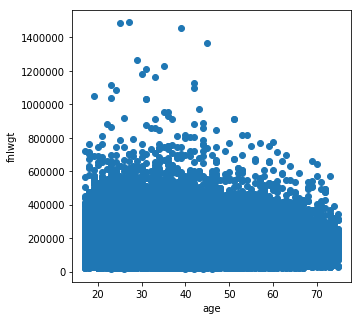

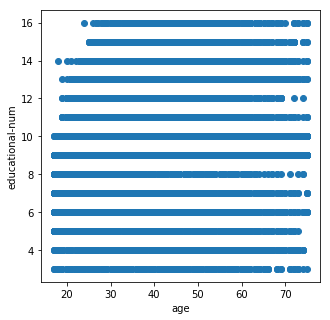

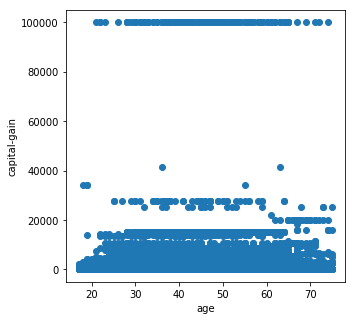

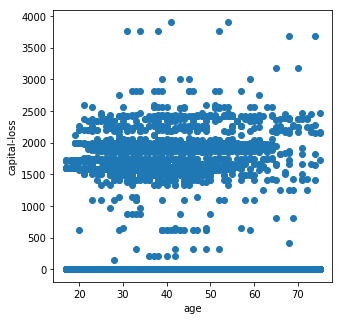

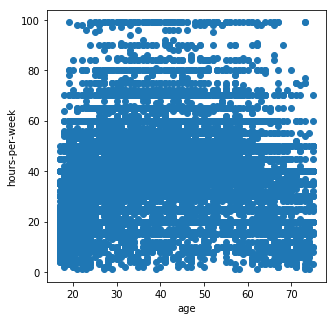

In [27]:
for num_var in num_features:
    plt.figure(figsize=(5,5))
    plt.xlabel('age')
    plt.ylabel(num_var)
    x=df['age']
    y=df[num_var]
    plt.scatter(x,y)

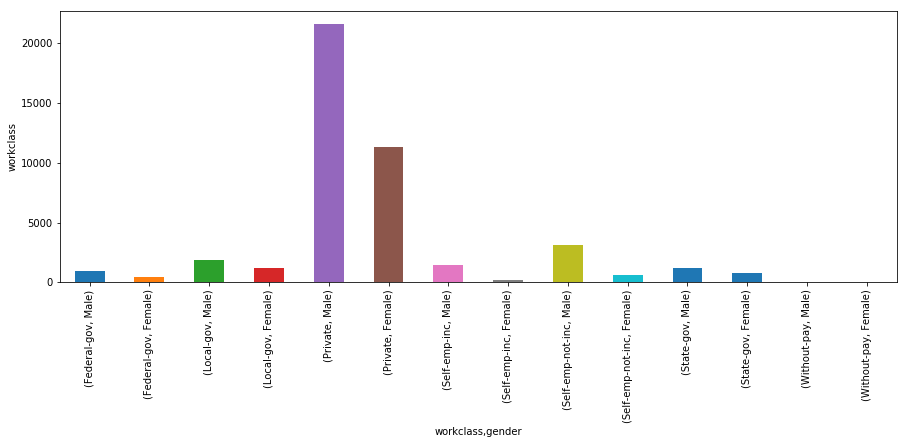

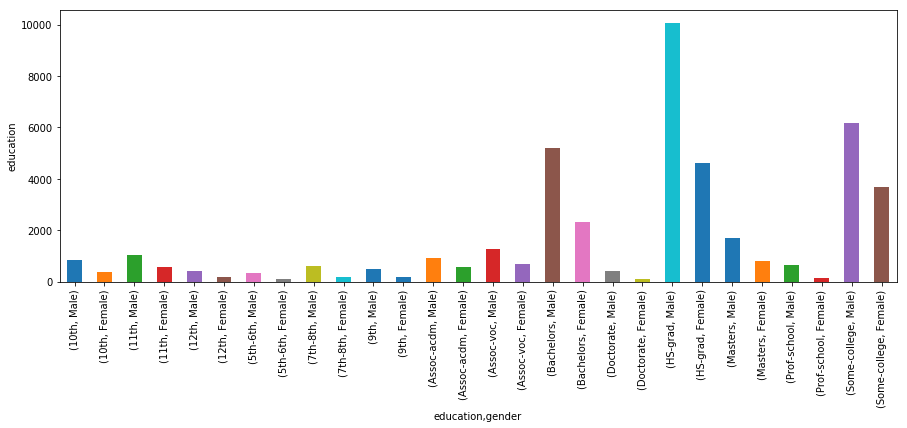

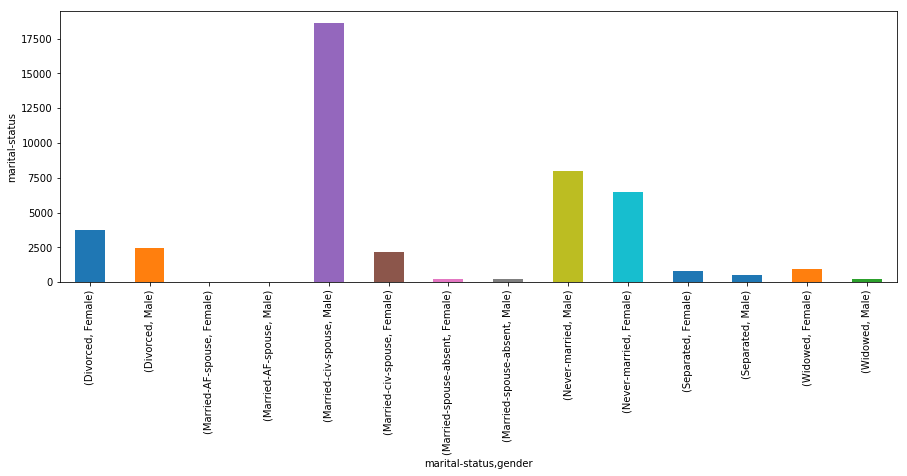

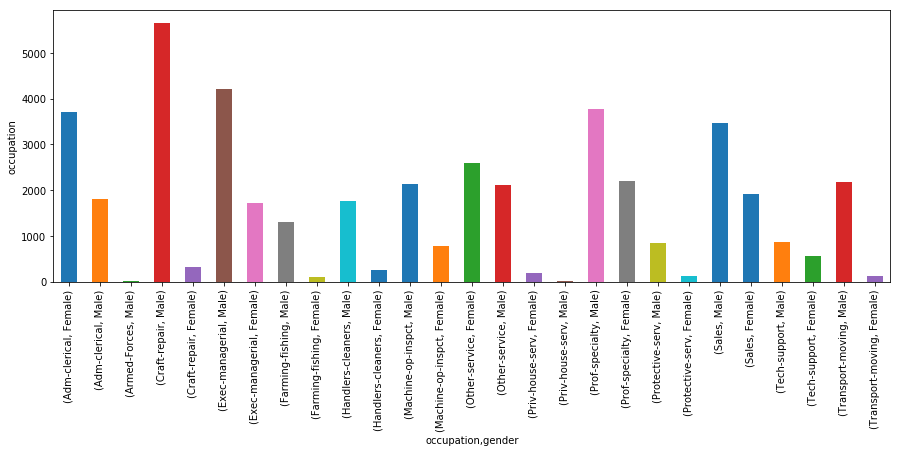

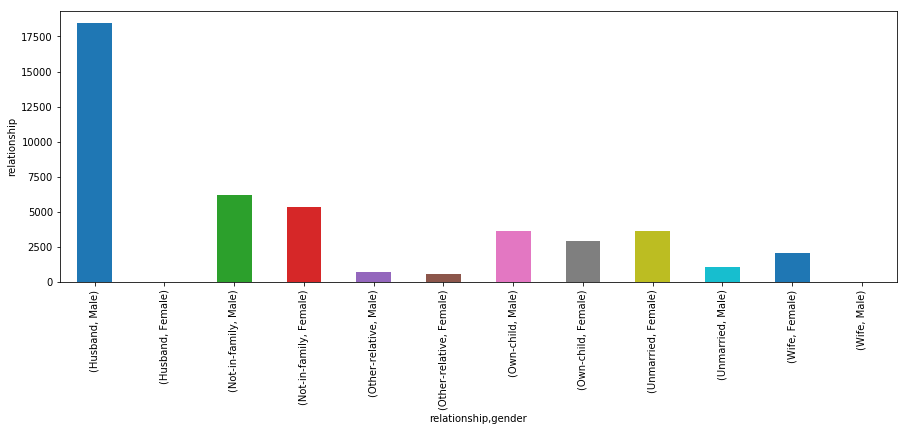

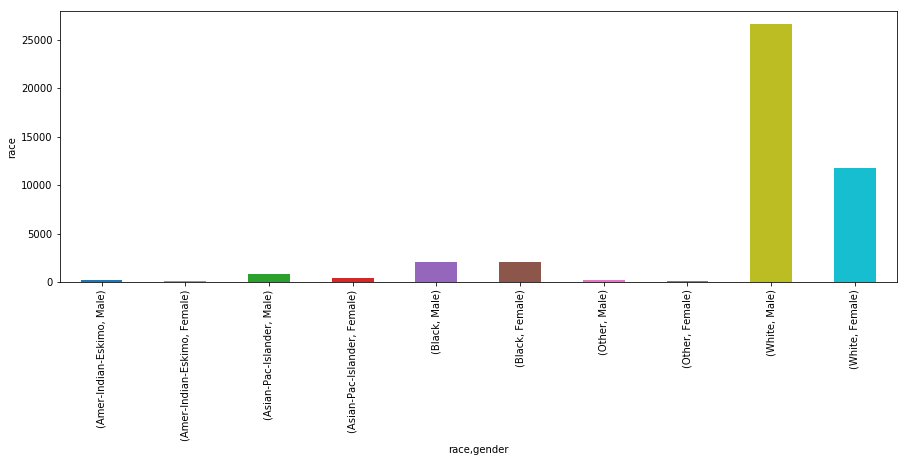

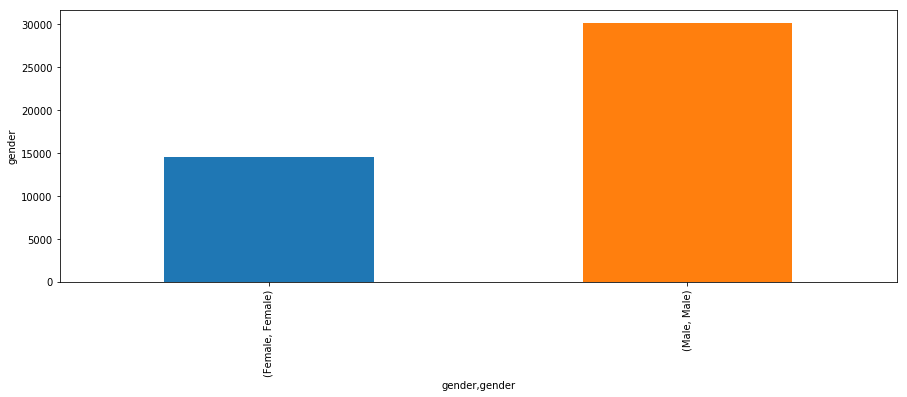

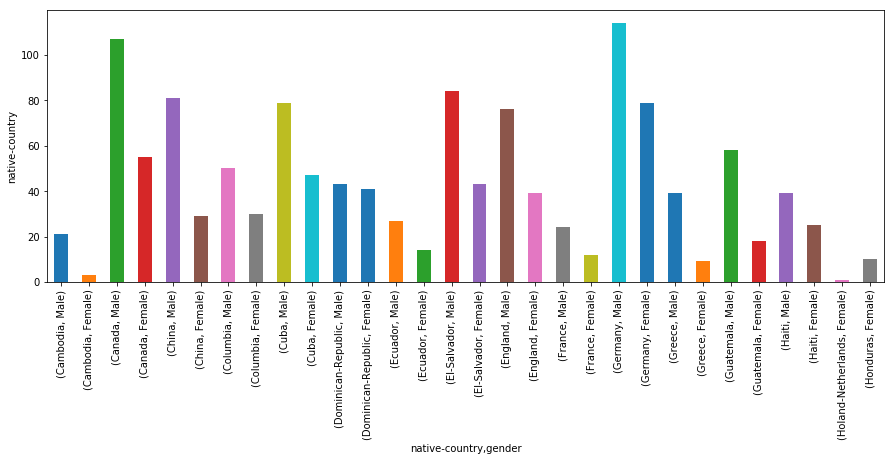

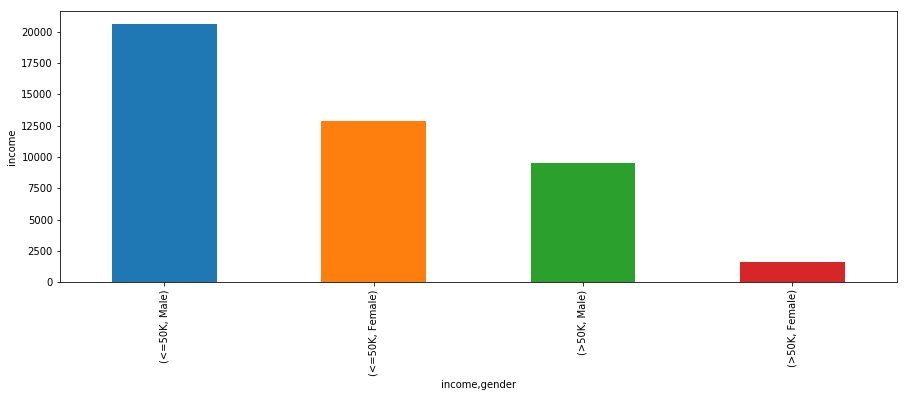

In [28]:
for cat_var in cat_features:
    plt.figure(figsize=(15,5))
    plt.xticks(rotation=45)
    plt.xlabel('age')
    plt.ylabel(cat_var)
    x=df['age']
    y=df[cat_var]
    df.groupby(cat_var)['gender'].value_counts().head(30).plot.bar()

### Feature Transformation:

In [29]:
df['income'].replace('>50K',1,inplace=True)
df['income'].replace('<=50K',0,inplace=True)

In [30]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0


In [31]:
df['income'].value_counts()

0    33514
1    11151
Name: income, dtype: int64

In [32]:
df['income'].value_counts(normalize = True)

0    0.750341
1    0.249659
Name: income, dtype: float64

In [33]:
df['gender'].value_counts(normalize=True)

Male      0.674555
Female    0.325445
Name: gender, dtype: float64

### Chi_Square test

In [34]:
from scipy.stats import chi2
from scipy.stats import chi2_contingency

In [35]:
pd.crosstab(df['gender'],df['occupation'],margins=True)

occupation,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,All
gender,,,,,,,,,,,,,,,
Female,3704,0,312,1713,94,251,776,2593,194,2189,120,1912,554,124,14536
Male,1796,14,5658,4218,1309,1759,2138,2106,14,3780,847,3455,865,2170,30129
All,5500,14,5970,5931,1403,2010,2914,4699,208,5969,967,5367,1419,2294,44665


In [36]:
# These are the observed frequencies

observed = pd.crosstab(df.occupation, df.gender)

observed

gender,Female,Male
occupation,,
Adm-clerical,3704,1796
Armed-Forces,0,14
Craft-repair,312,5658
Exec-managerial,1713,4218
Farming-fishing,94,1309
Handlers-cleaners,251,1759
Machine-op-inspct,776,2138
Other-service,2593,2106
Priv-house-serv,194,14


In [37]:
# chi2_contigency returns chi2 test statistic, p-value, degree of freedoms, expected frequencies

chi2_contingency(observed)

(8439.690864343722, 0.0, 13, array([[1789.9473861 , 3710.0526139 ],
        [   4.55622971,    9.44377029],
        [1942.90652636, 4027.09347364],
        [1930.21417217, 4000.78582783],
        [ 456.59930594,  946.40069406],
        [ 654.14440837, 1355.85559163],
        [ 948.34666965, 1965.65333035],
        [1529.26595768, 3169.73404232],
        [  67.69255569,  140.30744431],
        [1942.58108138, 4026.41891862],
        [ 314.70529497,  652.29470503],
        [1746.66320385, 3620.33679615],
        [ 461.80642561,  957.19357439],
        [ 746.57078249, 1547.42921751]]))

In [38]:
# Computing chi2 test statistic, p-value, degree of freedoms

chi2_test_stat = chi2_contingency(observed)[0]
pval = chi2_contingency(observed)[1]
df = chi2_contingency(observed)[2]

In [43]:
print('Chi test Stats =', chi2_test_stat)
print('P value is =', pval)
print('Degree of freedom =', df)

Chi test Stats = 8439.690864343722
P value is = 0.0
Degree of freedom = 13


In [39]:
alpha = 1 - 0.90

chi2_critical = chi2.ppf(1 - alpha, df)

chi2_critical

19.81192930712756

In [40]:
if(chi2_test_stat > chi2_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis


In [41]:
if(pval < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis
